## Step 7 - Adding in ranking data from a list that details the 59 most popular national parks

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as mpatches
from mpl_toolkits.basemap import Basemap
import zipcode
%matplotlib inline 

### Data for park ranking from http://www.theactivetimes.com/59-national-parks-ranked?utm_source=huffington%2Bpost&utm_medium=partner&utm_campaign=nationalparks

In [7]:
parks = pd.DataFrame.from_csv("Ultimate_Master_3.csv")
parks.Ranking.fillna(value=0, inplace=True)
parks.head()

,Zip,Best Season,2nd Best Season,3rd Best Season,4th Best Season,Off Season,Best color,ZObjects,Lat,Lon,Closest Station,Best Precip,Best Temp,Ranking
Abraham Lincoln Birthplace NHP,42748,7,6,8,5,1,green,<Zip: 42748>,37.56,-85.73,USC00153929,8,5,0
Acadia NP,4660,8,7,9,6,12,teal,<Zip: 04660>,44.31,-68.36,USC00170100,8,11,7
Adams NHP,2169,7,8,6,9,1,green,<Zip: 02169>,42.26,-71.00,USC00193624,9,3,0
African Burial Ground NM,10007,7,5,6,4,1,green,<Zip: 10007>,40.71,-73.99,USW00094728,2,7,0
Agate Fossil Beds NM,69346,7,6,8,9,2,green,<Zip: 69346>,42.68,-103.88,USC00253615,1,5,0


In [9]:
road_trip_parks = parks[parks['Ranking'] != 0]
road_trip_parks.to_csv("Road_Trip.csv")

In [10]:
road_trip_parks

,Zip,Best Season,2nd Best Season,3rd Best Season,4th Best Season,Off Season,Best color,ZObjects,Lat,Lon,Closest Station,Best Precip,Best Temp,Ranking
Acadia NP,4660,8,7,9,6,12,teal,<Zip: 04660>,44.31,-68.36,USC00170100,8,11,7
Arches NP,84532,5,6,7,8,1,yellow,<Zip: 84532>,38.45,-109.60,USC00425733,6,10,13
Badlands NP,57790,7,8,6,9,2,green,<Zip: 57790>,43.99,-102.23,USC00398911,1,5,49
Big Bend NP,79834,3,4,11,2,7,orange,<Zip: 79834>,29.28,-103.18,USC00416792,3,7,20
Biscayne NP,33032,7,5,6,8,12,green,<Zip: 33032>,25.46,-80.45,USW00012826,0,0,46
Black Canyon of the Gunnison NP,81415,7,6,8,9,2,green,<Zip: 81415>,38.70,-107.60,USC00056306,6,10,50
Bryce Canyon NP,84764,7,8,9,6,1,green,<Zip: 84764>,37.63,-112.20,USC00421008,6,8,30
Canyonlands NP,84532,5,9,6,4,1,yellow,<Zip: 84532>,38.45,-109.60,USC00425733,6,10,16
Capitol Reef NP,84775,9,5,6,7,1,blue,<Zip: 84775>,38.33,-111.06,USC00421171,12,8,15
Carlsbad Caverns NP,88220,7,6,3,8,1,green,<Zip: 88220>,32.40,-104.23,USC00291469,1,9,38


C:\Users\bborlas\AppData\Local\Continuum\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


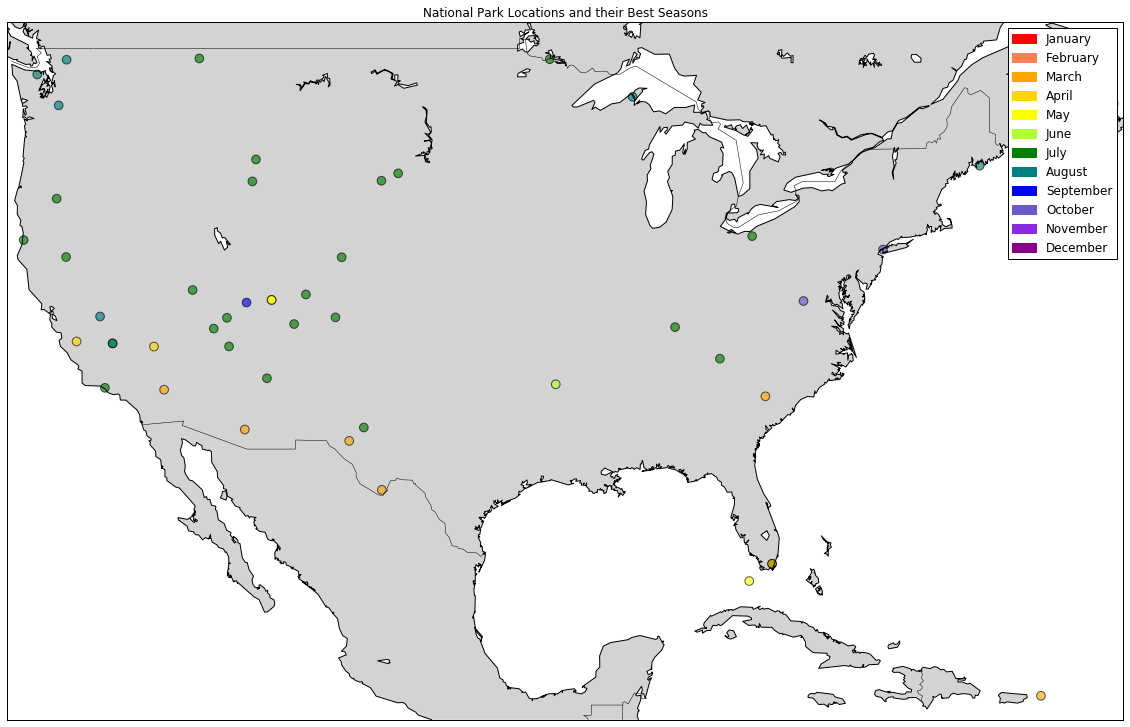

In [13]:
#defining the size of the plot
plt.figure(figsize=(20,15))

#defining what kind of map I want, and the area it should show
themap = Basemap(projection='merc', llcrnrlon = -125, llcrnrlat = 17, urcrnrlon = -60,
              urcrnrlat = 50, resolution = 'l', area_thresh = 1000.0)

#drawing the lines of the map
themap.drawcoastlines()
themap.drawcountries()
themap.fillcontinents(color = 'lightgray',zorder=0)
themap.drawmapboundary()

#making a scatter plot using the coordinates from the master csv
x,y = themap(road_trip_parks.Lon.tolist(), road_trip_parks.Lat.tolist())
themap.scatter(x,y, s=75, c=road_trip_parks['Best color'].tolist(), marker='o',cmap=cm.cool, alpha=0.65)

#making a legend that has the appropriate colors
jan = mpatches.Patch(color='red', label='January')
feb = mpatches.Patch(color='coral', label='February')
mar = mpatches.Patch(color='orange', label='March')
apr = mpatches.Patch(color='gold', label='April')
may = mpatches.Patch(color='yellow', label='May')
jun = mpatches.Patch(color='greenyellow', label='June')
jul = mpatches.Patch(color='green', label='July')
aug = mpatches.Patch(color='teal', label='August')
sep = mpatches.Patch(color='blue', label='September')
octo = mpatches.Patch(color='slateblue', label='October')
nov = mpatches.Patch(color='blueviolet', label='November')
dec = mpatches.Patch(color='darkmagenta', label='December')

#actually plotting the plot
plt.legend(handles=[jan,feb,mar,apr,may,jun,jul,aug,sep,octo,nov,dec])
plt.legend()
plt.title("National Park Locations and their Best Seasons")
plt.show()

In [ ]:
for i in range(len(road_trip_parks)):
    for j in range(len(road_trip_parks)):
        dist = 
        
        #find 5 closest that also have best, 2nd best, 3rd best seasons, or best temp or precip same as best season
        #put them in an array in the ranking number corresponding
        



In [ ]:
#make a map with lines connecting those that match
#then make a map with the suggested road trip